In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import datetime as dt
import seaborn as sb

In [2]:
df = pd.read_csv("../NguyenHT/data/raw/Car_details_v3.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.drop(columns=['name'], inplace=True)
df['age'] = dt.date.today().year - df.year
df.drop(columns=['year'], inplace=True)

In [5]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,15


In [6]:
df['torque'].unique

<bound method Series.unique of 0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
7554        219.7Nm@ 1500-2750rpm
7555             113.7Nm@ 4000rpm
7556    24@ 1,900-2,750(kgm@ rpm)
7557               190Nm@ 2000rpm
7558          140Nm@ 1800-3000rpm
Name: torque, Length: 7559, dtype: object>

In [7]:
df['max_power'].unique

<bound method Series.unique of 0           74 bhp
1       103.52 bhp
2           78 bhp
3           90 bhp
4         88.2 bhp
           ...    
7554     88.73 bhp
7555     82.85 bhp
7556       110 bhp
7557      73.9 bhp
7558        70 bhp
Name: max_power, Length: 7559, dtype: object>

In [8]:
df.drop(columns=['torque'], inplace=True)

In [9]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,15


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7559 entries, 0 to 7558
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  7559 non-null   int64  
 1   km_driven      7559 non-null   int64  
 2   fuel           7559 non-null   object 
 3   seller_type    7559 non-null   object 
 4   transmission   7559 non-null   object 
 5   owner          7559 non-null   object 
 6   mileage        7360 non-null   object 
 7   engine         7360 non-null   object 
 8   max_power      7363 non-null   object 
 9   seats          7360 non-null   float64
 10  age            7559 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 649.7+ KB


In [11]:
df['mileage'] = df['mileage'].str.extract('(\d+)').astype(float)
df['engine'] = df['engine'].str.extract('(\d+)').astype(float)
df['max_power'] = df['max_power'].str.extract('(\d+)').astype(float)

In [12]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,5.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,5.0,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.0,5.0,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.0,5.0,15


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7559 entries, 0 to 7558
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  7559 non-null   int64  
 1   km_driven      7559 non-null   int64  
 2   fuel           7559 non-null   object 
 3   seller_type    7559 non-null   object 
 4   transmission   7559 non-null   object 
 5   owner          7559 non-null   object 
 6   mileage        7360 non-null   float64
 7   engine         7360 non-null   float64
 8   max_power      7362 non-null   float64
 9   seats          7360 non-null   float64
 10  age            7559 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 649.7+ KB


In [14]:
df.dropna(axis=0, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7359 entries, 0 to 7558
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  7359 non-null   int64  
 1   km_driven      7359 non-null   int64  
 2   fuel           7359 non-null   object 
 3   seller_type    7359 non-null   object 
 4   transmission   7359 non-null   object 
 5   owner          7359 non-null   object 
 6   mileage        7359 non-null   float64
 7   engine         7359 non-null   float64
 8   max_power      7359 non-null   float64
 9   seats          7359 non-null   float64
 10  age            7359 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 689.9+ KB


In [16]:
df.fuel = pd.Categorical(df.fuel)
df = df.assign(fuel_code=df.fuel.cat.codes)
df.seller_type = pd.Categorical(df.seller_type)
df = df.assign(seller_type_code=df.seller_type.cat.codes)
df.transmission = pd.Categorical(df.transmission)
df = df.assign(transmission_code=df.transmission.cat.codes)
df.owner = pd.Categorical(df.owner)
df = df.assign(owner_code=df.owner.cat.codes)

In [17]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,fuel_code,seller_type_code,transmission_code,owner_code
0,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,5.0,8,1,1,1,0
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,5.0,8,1,1,1,2
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.0,5.0,16,3,1,1,4
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0,12,1,1,1,0
4,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.0,5.0,15,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7554,475000,80000,Diesel,Individual,Manual,Second Owner,22.0,1396.0,88.0,5.0,8,1,1,1,2
7555,320000,110000,Petrol,Individual,Manual,First Owner,18.0,1197.0,82.0,5.0,9,3,1,1,0
7556,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.0,1493.0,110.0,5.0,15,1,1,1,1
7557,382000,120000,Diesel,Individual,Manual,First Owner,19.0,1248.0,73.0,5.0,13,1,1,1,0


C:\Users\htien\AppData\Local\Temp\ipykernel_7828\942198276.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True)


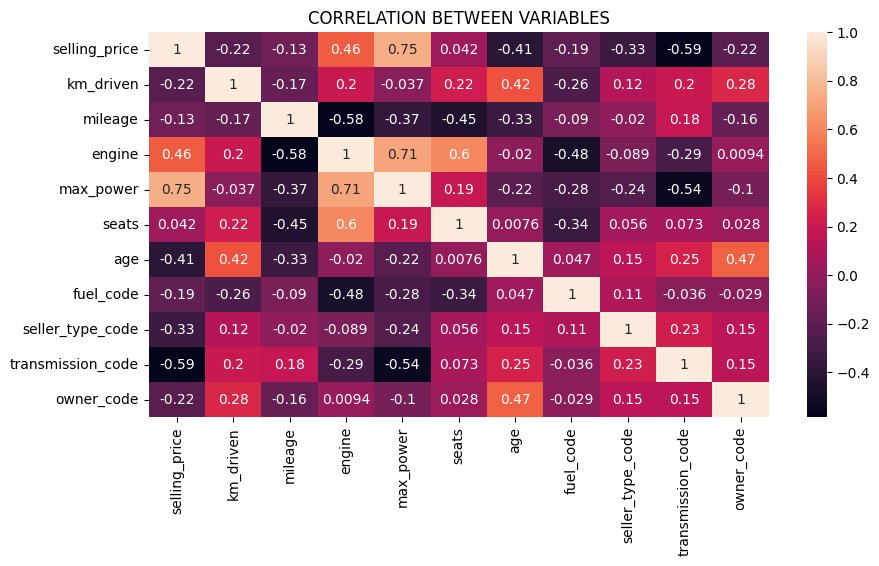

In [18]:
plt.figure(figsize=(10, 5))
sb.heatmap(df.corr(), annot=True)
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

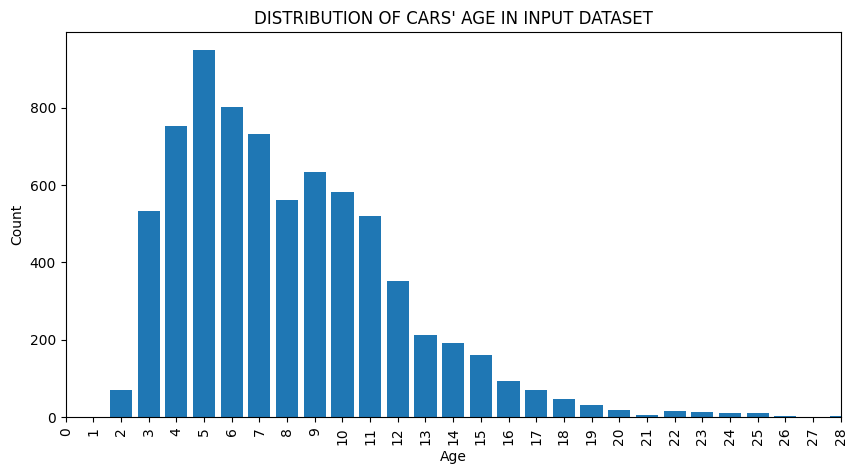

In [19]:
values = []
levels = df['age'].unique()
for level in levels:
    values.append(df['age'].loc[df['age'] == level].count())
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(levels, values)
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Count")
plt.xlim(0, max(levels))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title("DISTRIBUTION OF CARS' AGE IN INPUT DATASET")
plt.show()

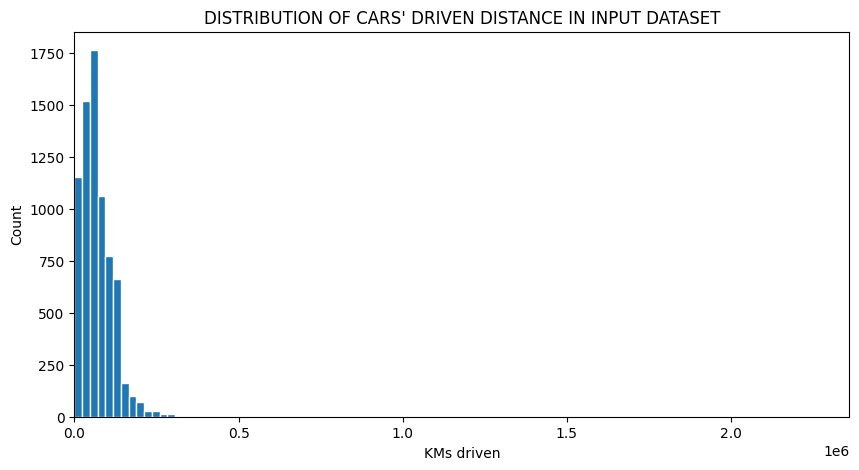

In [20]:
plt.figure(figsize=(10, 5))
bin_number = 100
plt.hist(df.km_driven, bins=bin_number, edgecolor="white")
plt.xlabel("KMs driven")
plt.xlim(0, max(df.km_driven))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF CARS' DRIVEN DISTANCE IN INPUT DATASET")
plt.show()

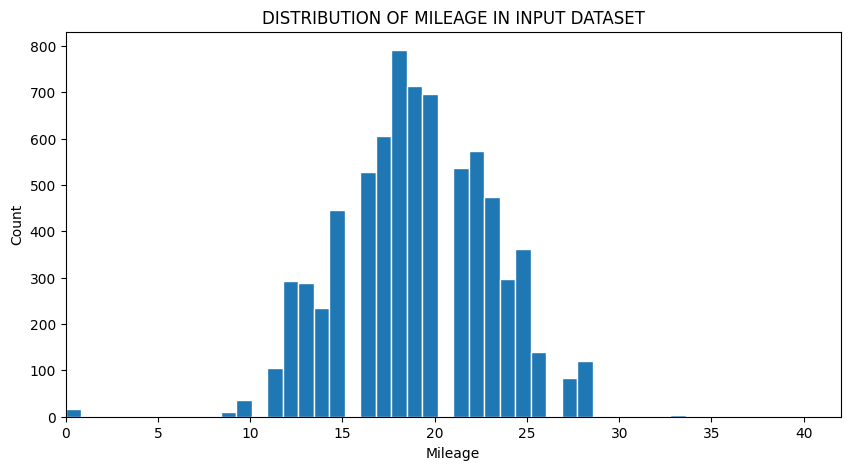

In [21]:
plt.figure(figsize=(10, 5))
bin_number = 50
plt.hist(df.mileage, bins=bin_number, edgecolor="white")
plt.xlabel("Mileage")
plt.xlim(0, max(df.mileage))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF MILEAGE IN INPUT DATASET")
plt.show()

In [22]:
for x in df.index:
    if df.loc[x, "mileage"] < 5:
        df.drop(x, inplace=True)

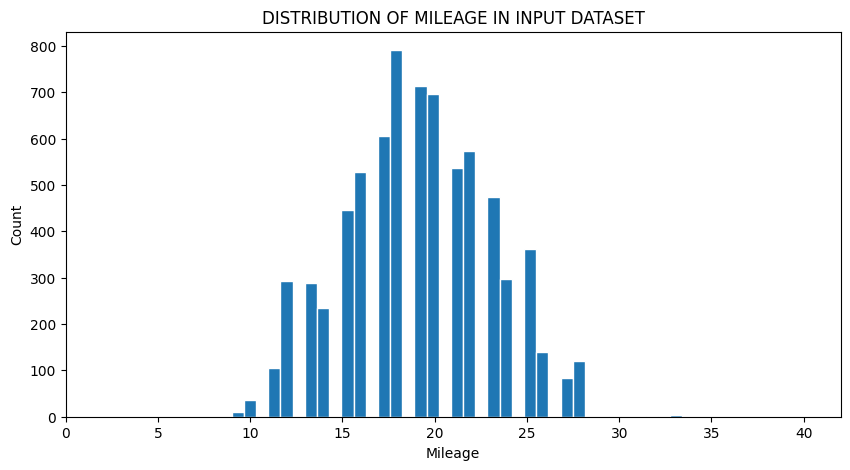

In [23]:
plt.figure(figsize=(10, 5))
bin_number = 50
plt.hist(df.mileage, bins=bin_number, edgecolor="white")
plt.xlabel("Mileage")
plt.xlim(0, max(df.mileage))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF MILEAGE IN INPUT DATASET")
plt.show()

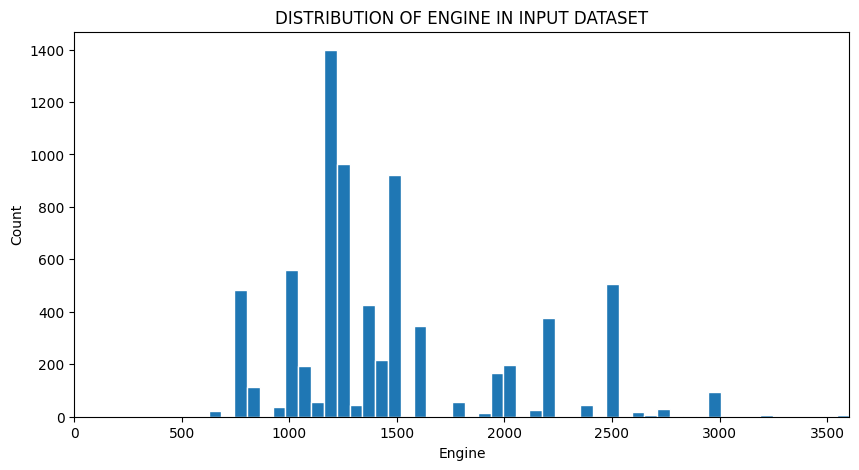

In [24]:
plt.figure(figsize=(10, 5))
bin_number = 50
plt.hist(df.engine, bins=bin_number, edgecolor="white")
plt.xlabel("Engine")
plt.xlim(0, max(df.engine))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF ENGINE IN INPUT DATASET")
plt.show()

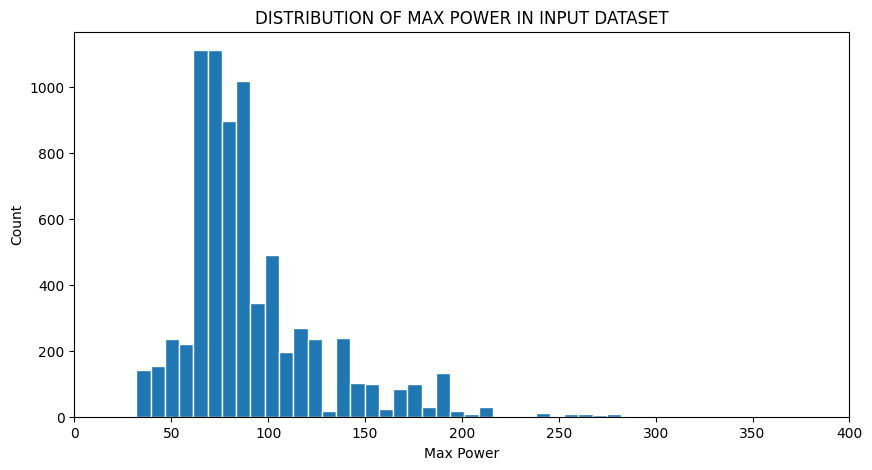

In [25]:
plt.figure(figsize=(10, 5))
bin_number = 50
plt.hist(df.max_power, bins=bin_number, edgecolor="white")
plt.xlabel("Max Power")
plt.xlim(0, max(df.max_power))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF MAX POWER IN INPUT DATASET")
plt.show()

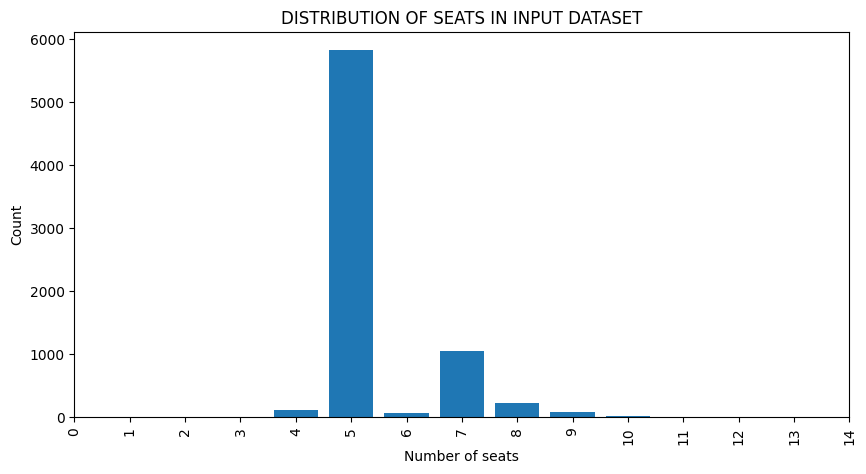

In [26]:
values = []
levels = df['seats'].unique()
for level in levels:
    values.append(df['seats'].loc[df['seats'] == level].count())
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(levels, values)
plt.xticks(rotation=90)
plt.xlabel("Number of seats")
plt.ylabel("Count")
plt.xlim(0, max(levels))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title("DISTRIBUTION OF SEATS IN INPUT DATASET")
plt.show()

In [27]:
fuel = df.fuel.value_counts()
fuel

Diesel    4005
Petrol    3257
CNG         48
LPG         33
Name: fuel, dtype: int64

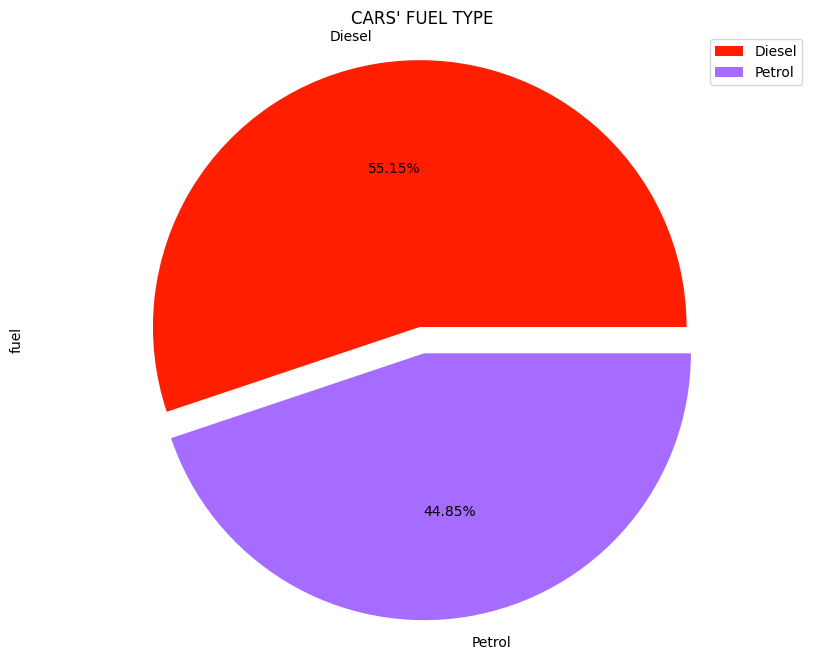

In [28]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

fuel[:2].plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=fuel[:2].index, loc="best")
plt.title("CARS' FUEL TYPE")
plt.show()

In [29]:
owner = df.owner.value_counts()
owner

First Owner             4842
Second Owner            1874
Third Owner              479
Fourth & Above Owner     143
Test Drive Car             5
Name: owner, dtype: int64

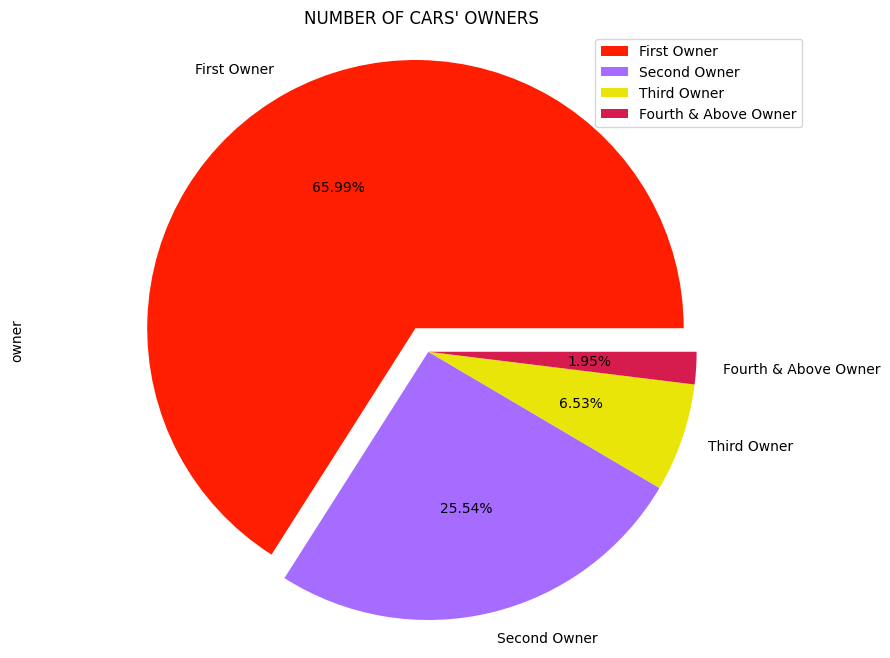

In [30]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0, 0, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

owner[:4].plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=owner[:4].index, loc="best")
plt.title("NUMBER OF CARS' OWNERS")
plt.show()

In [31]:
transmission = df.transmission.value_counts()
transmission

Manual       6374
Automatic     969
Name: transmission, dtype: int64

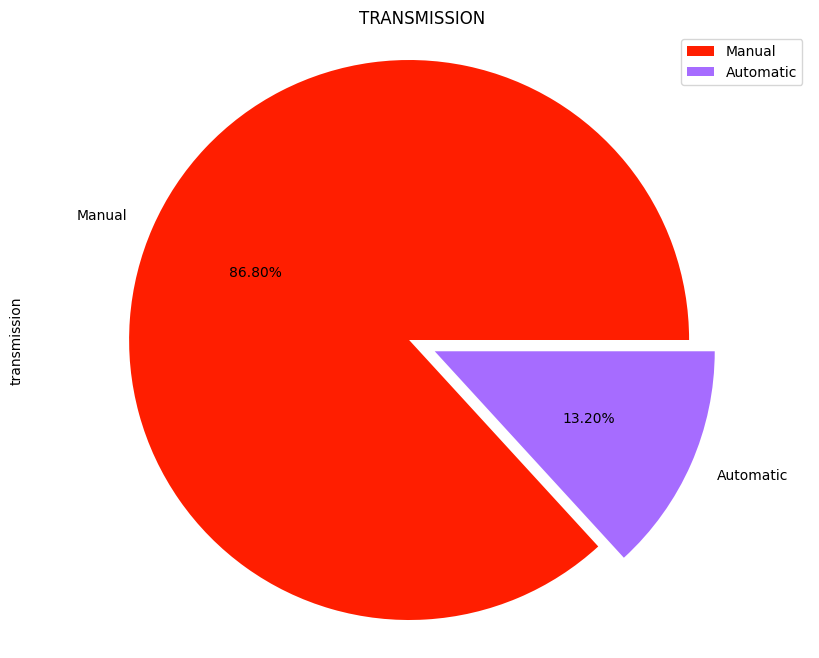

In [32]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

transmission.plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=transmission.index, loc="best")
plt.title("TRANSMISSION")
plt.show()

In [33]:
seller_type = df.seller_type.value_counts()
seller_type

Individual          6100
Dealer              1027
Trustmark Dealer     216
Name: seller_type, dtype: int64

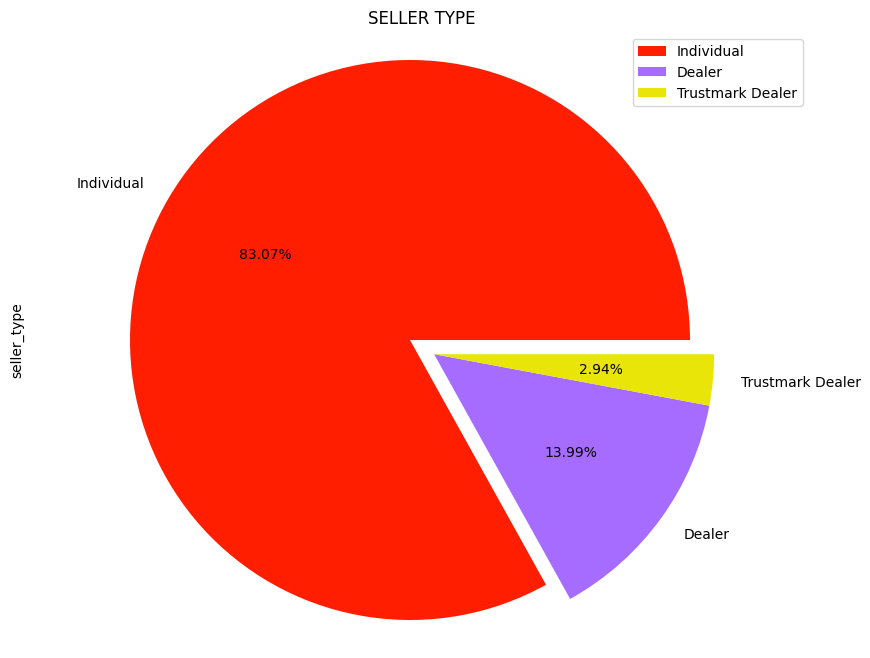

In [34]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

seller_type.plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=seller_type.index, loc="best")
plt.title("SELLER TYPE")
plt.show()

[5642, 605, 127]
[458, 422, 89]


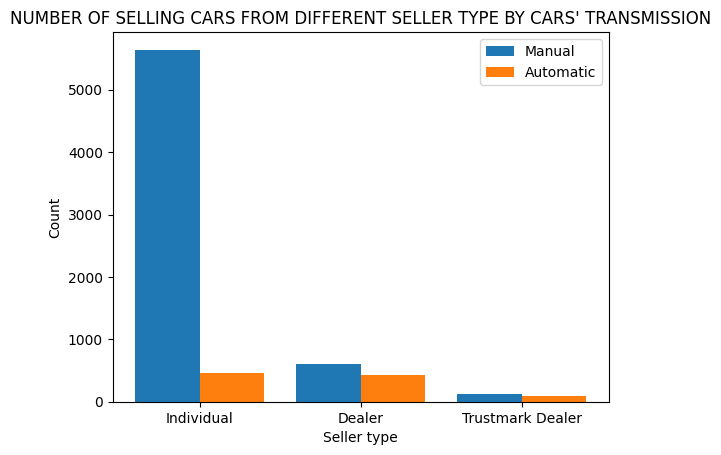

In [35]:
levels = df.seller_type.unique()
values_1 = []
values_2 = []
for level in levels:
    values_1.append(df['seller_type'].loc[df.transmission == 'Manual'].loc[df['seller_type'] == level].count())
    values_2.append(df['seller_type'].loc[df.transmission == 'Automatic'].loc[df['seller_type'] == level].count())
X_axis = np.arange(len(levels))

plt.bar(X_axis - 0.2, values_1, label='Manual', width=0.4)
plt.bar(X_axis + 0.2, values_2, label='Automatic', width=0.4)
print(values_1)
print(values_2)
plt.xticks(X_axis, levels)
plt.xlabel("Seller type")
plt.ylabel("Count")
plt.title("NUMBER OF SELLING CARS FROM DIFFERENT SELLER TYPE BY CARS' TRANSMISSION")
plt.legend()
plt.show()

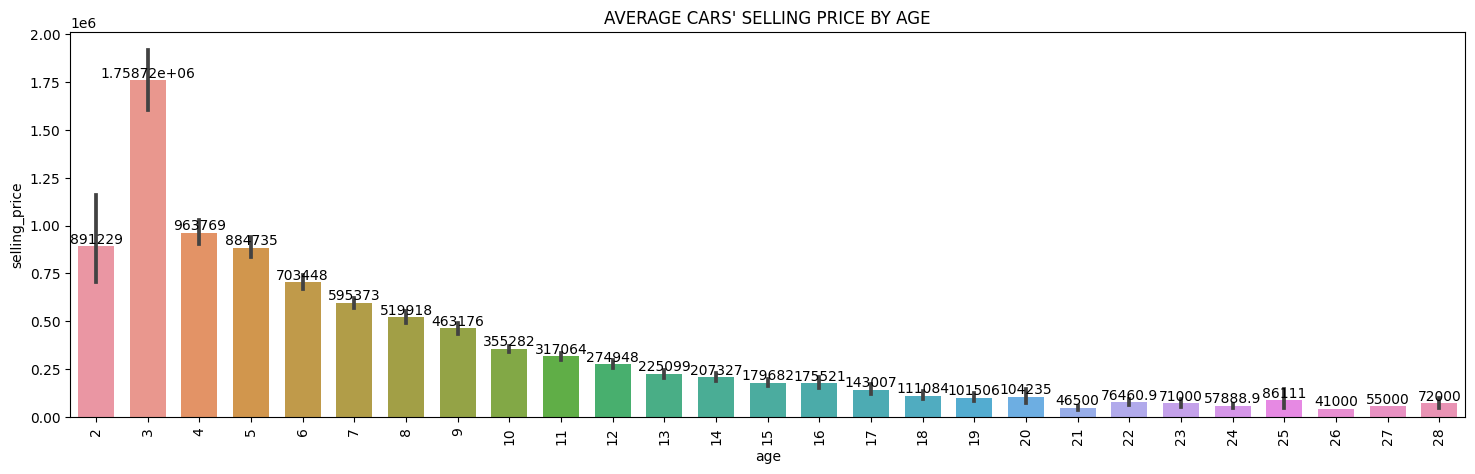

In [36]:
plt.figure(figsize=(18, 5))

ax = sns.barplot(x="age", y="selling_price", data=df, width=0.7)
plt.xticks(rotation=90)
plt.title("AVERAGE CARS' SELLING PRICE BY AGE")

for i in ax.containers:  #to set a label on top of the bars.
    ax.bar_label(i, )

Text(0.5, 1.0, 'AVERAGE SELLING PRICE BY DRIVEN DISTANCE')

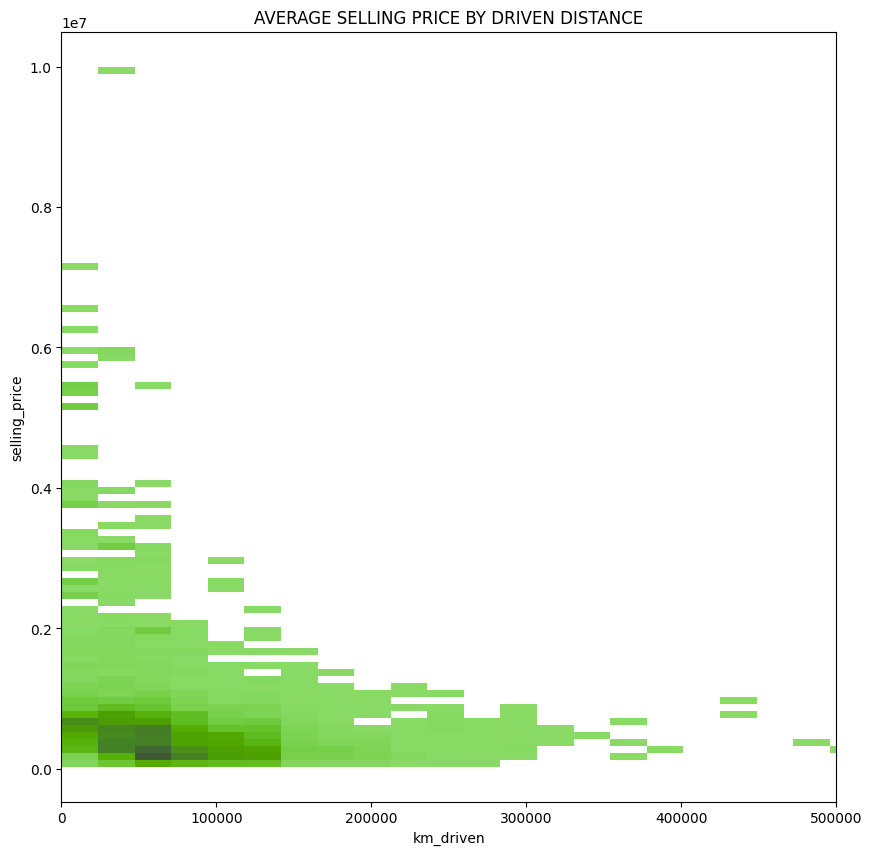

In [37]:
plt.figure(figsize=(10, 10))

ax = sns.histplot(x="km_driven", y="selling_price", data=df, bins=100, color="lawngreen")
plt.xlim(0, 500000)
plt.title("AVERAGE SELLING PRICE BY DRIVEN DISTANCE")

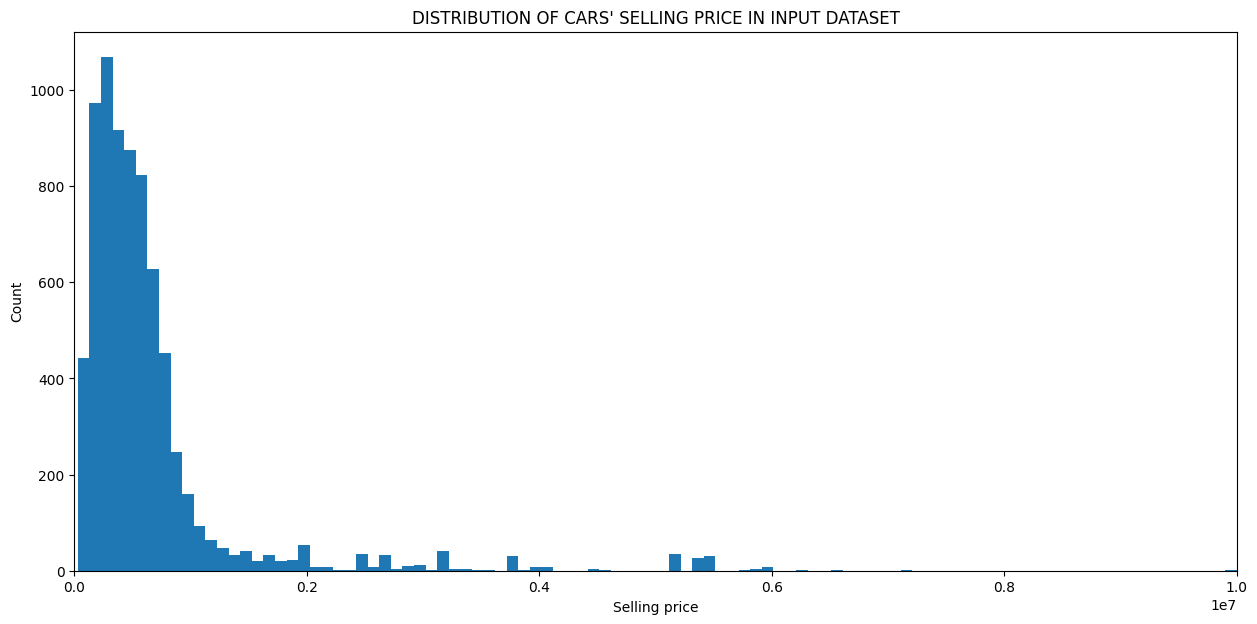

In [38]:
plt.figure(figsize=(15,7))
plt.hist(df.selling_price, bins = 100)
plt.title("DISTRIBUTION OF CARS' SELLING PRICE IN INPUT DATASET")
plt.xlabel("Selling price")
plt.ylabel("Count")
plt.xlim(0, max(df.selling_price))
plt.show()

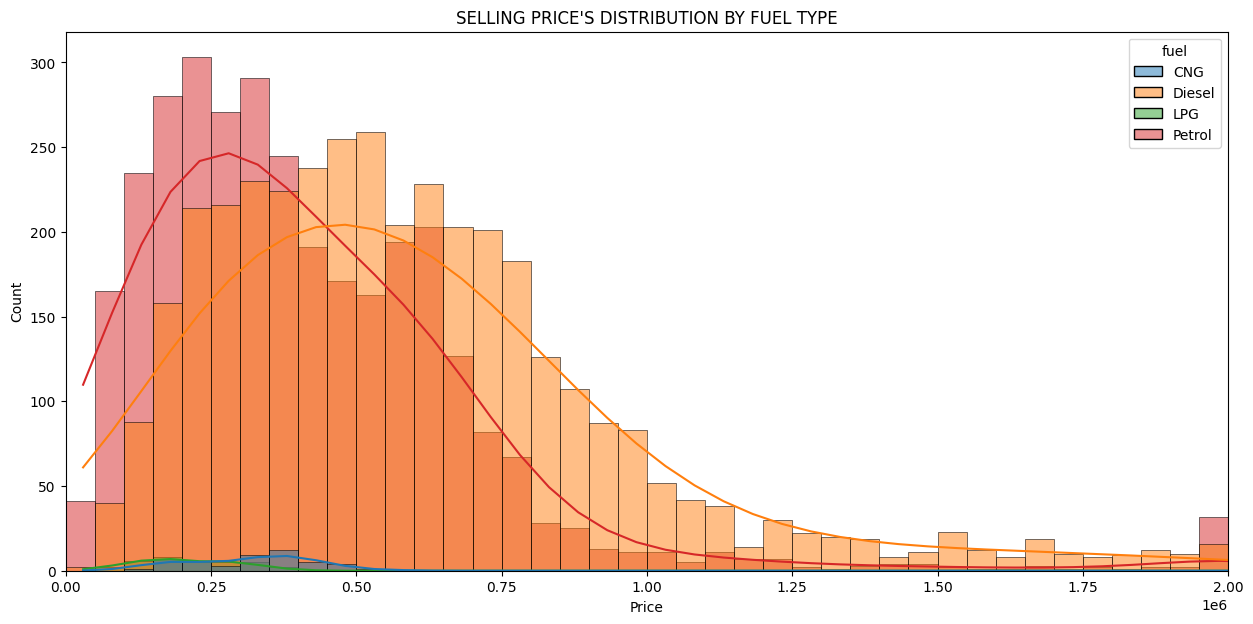

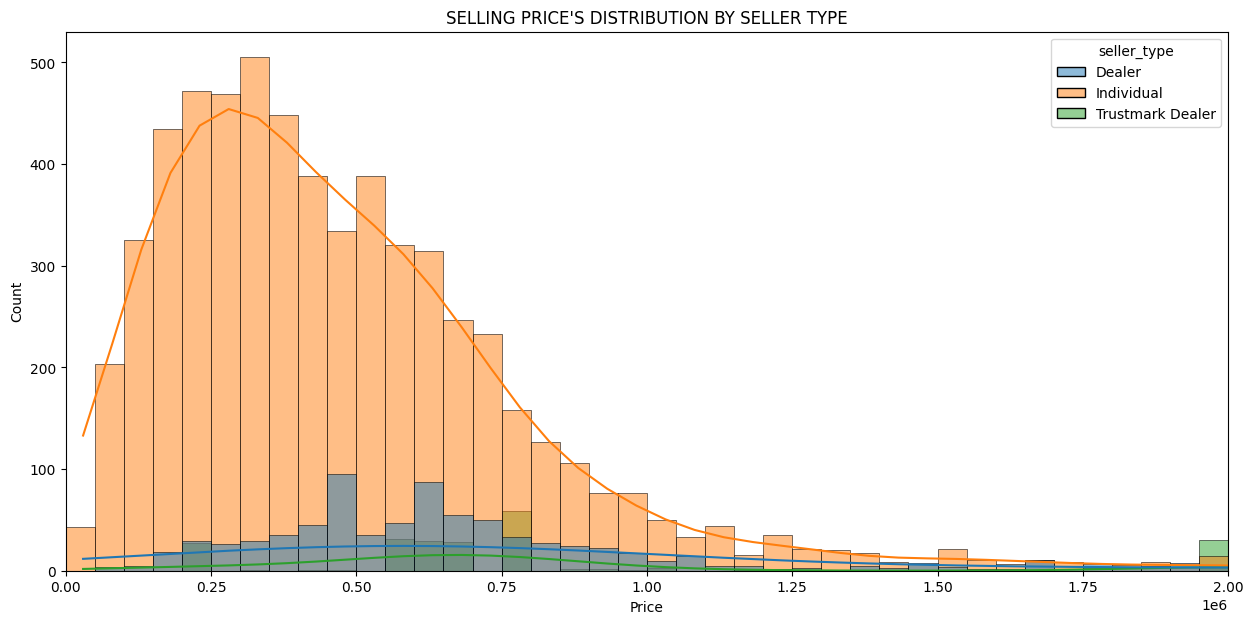

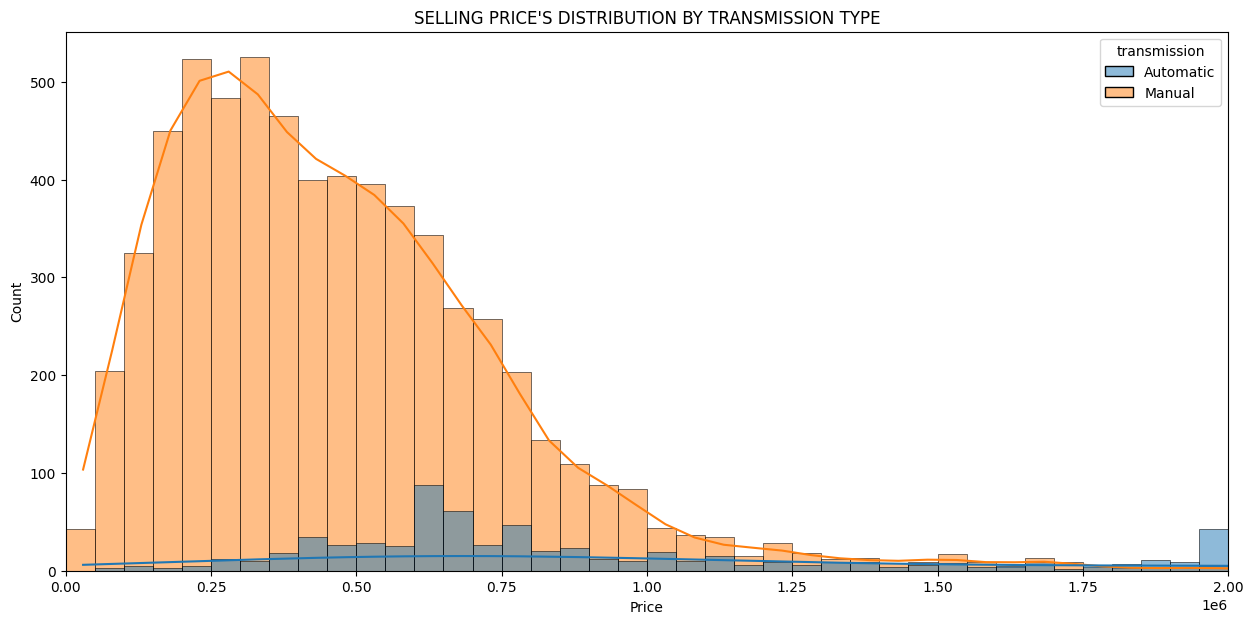

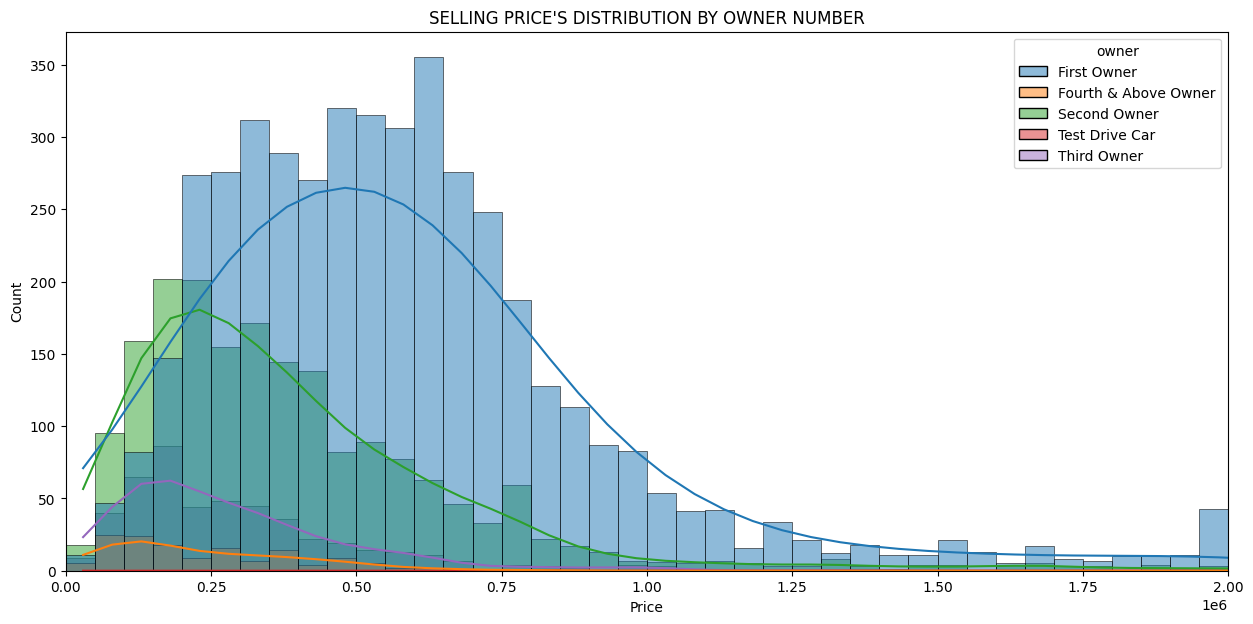

In [39]:
plt.figure(figsize=(15, 7))
sns.histplot(x='selling_price', data=df, kde=True, hue='fuel', bins=40, binrange=(0, 2000000))
plt.xlim(0, 2000000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("SELLING PRICE'S DISTRIBUTION BY FUEL TYPE")
plt.show()

plt.figure(figsize=(15, 7))
sns.histplot(x='selling_price', data=df, kde=True, hue='seller_type', bins=40, binrange=(0, 2000000))
plt.xlim(0, 2000000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("SELLING PRICE'S DISTRIBUTION BY SELLER TYPE")
plt.show()

plt.figure(figsize=(15, 7))
sns.histplot(x='selling_price', data=df, kde=True, hue='transmission', bins=40, binrange=(0, 2000000))
plt.xlim(0, 2000000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("SELLING PRICE'S DISTRIBUTION BY TRANSMISSION TYPE")
plt.show()

plt.figure(figsize=(15, 7))
sns.histplot(x='selling_price', data=df, kde=True, hue='owner', bins=40, binrange=(0, 2000000))
plt.xlim(0, 2000000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("SELLING PRICE'S DISTRIBUTION BY OWNER NUMBER")
plt.show()

Text(0.5, 1.0, 'AVERAGE SELLING PRICE BY MILEAGE')

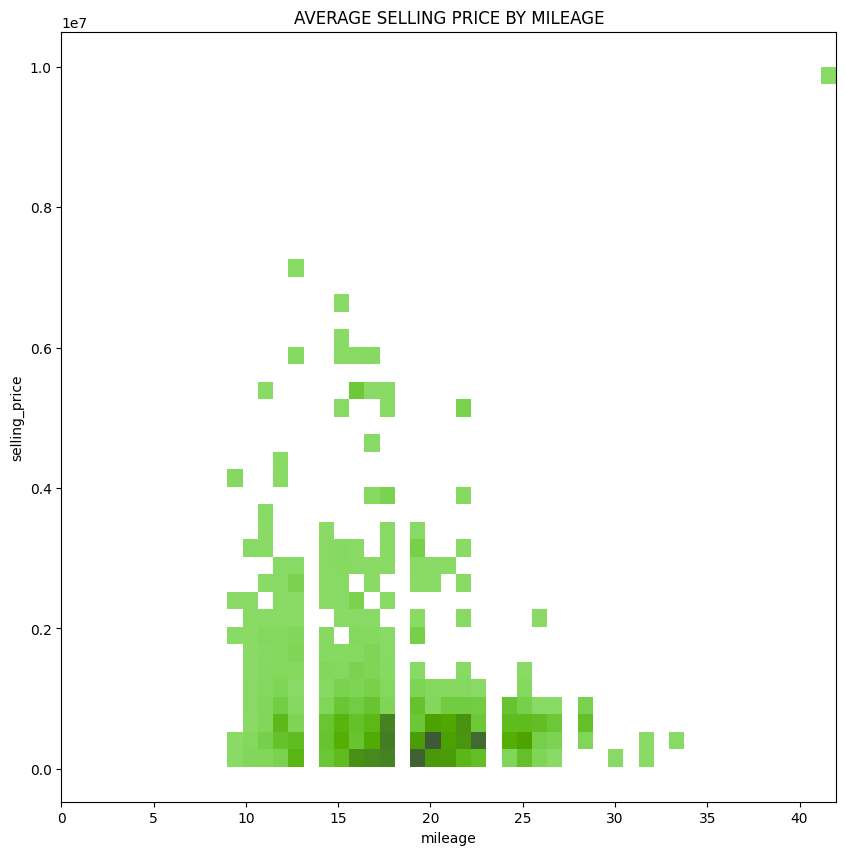

In [40]:
plt.figure(figsize=(10, 10))

ax = sns.histplot(x="mileage", y="selling_price", data=df, bins=40, color="lawngreen")
plt.xlim(0, max(df['mileage']))
plt.title("AVERAGE SELLING PRICE BY MILEAGE")

Text(0.5, 1.0, 'AVERAGE SELLING PRICE BY ENGINE')

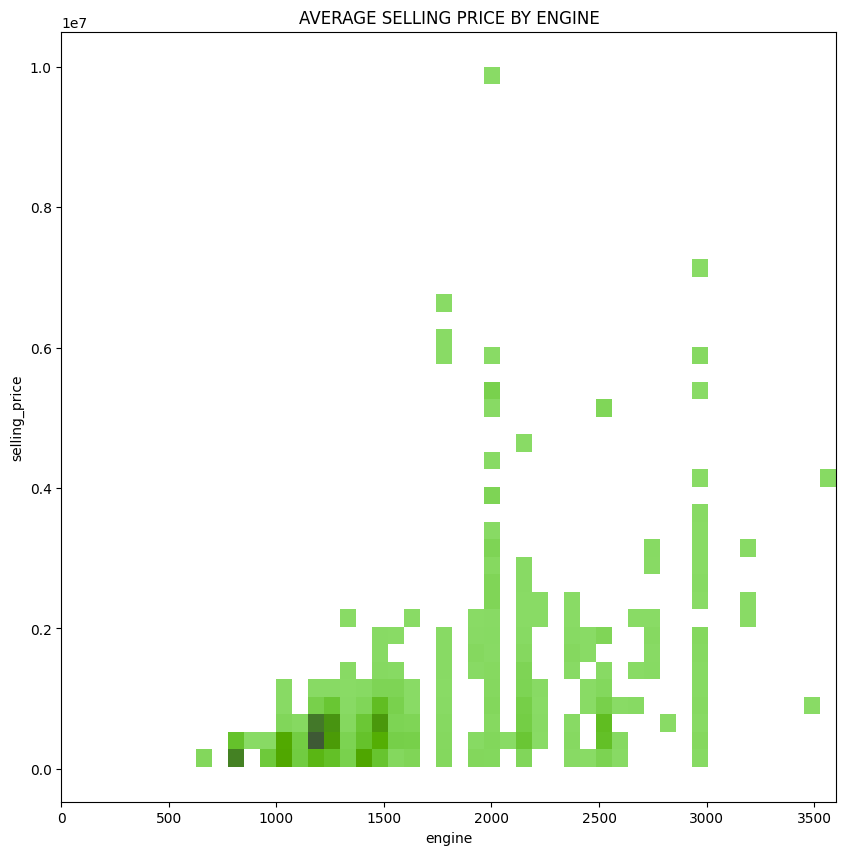

In [41]:
plt.figure(figsize=(10, 10))

ax = sns.histplot(x="engine", y="selling_price", data=df, bins=40, color="lawngreen")
plt.xlim(0, max(df['engine']))
plt.title("AVERAGE SELLING PRICE BY ENGINE")

Text(0.5, 1.0, 'AVERAGE SELLING PRICE BY MAX POWER')

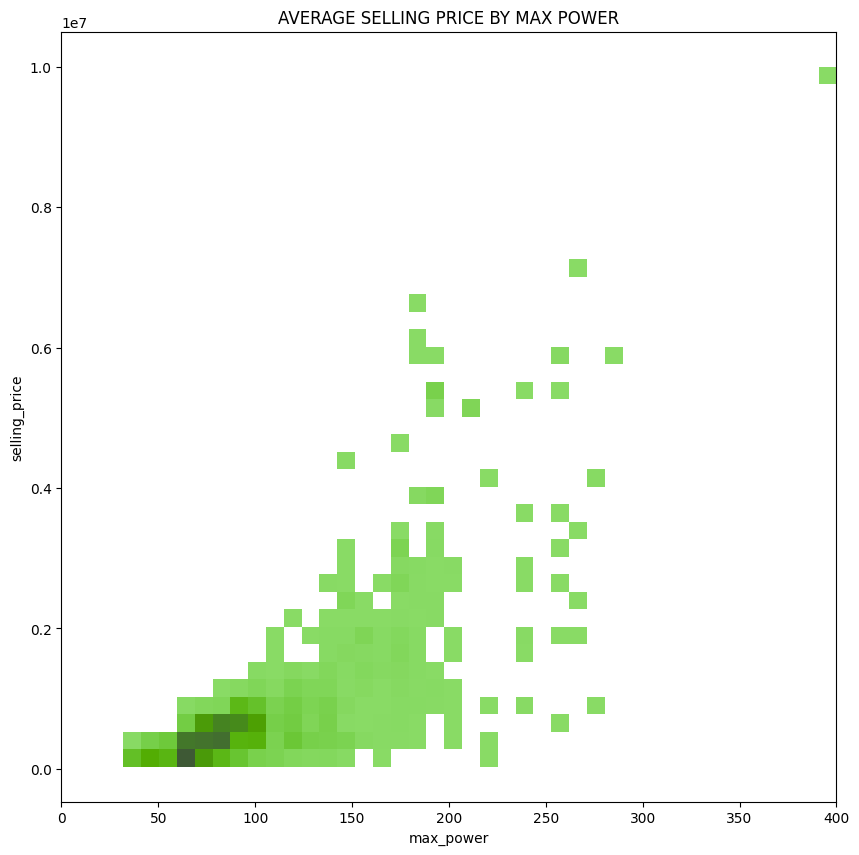

In [42]:
plt.figure(figsize=(10, 10))

ax = sns.histplot(x="max_power", y="selling_price", data=df, bins=40, color="lawngreen")
plt.xlim(0, max(df['max_power']))
plt.title("AVERAGE SELLING PRICE BY MAX POWER")